In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(c, Gamma_m, K_L): # Gamma_m (mol/m2), K_ad (L/mol)
    gamma_0 = 72.3  # mN/m
    R = 8.31 # N*m/(mol*K)
    T = 273 + 25 # K
    RT = R*T*1000 # mN*m/mol 
    return gamma_0 - (RT * Gamma_m) * np.log(1 + K_L * c) # mN/m

def szyszkowski(mol_name, data, ax):
    # # Szyszkowski eq
    # r = r0 - RT*Gamma_m* ln(1+Kc)
    # Extract the necessary columns from your data
    c = data['c'].values # mol/L
    gamma = data['gamma'].values # mN/m   
    T = data['temperature'].values[0]
    cmc = data['c'][data['cmc_indication']=='cmc'].values[0]
    logCMC = np.log10(cmc)
    cmc_idx = data['c'][data['cmc_indication']=='cmc'].index[0]
    gamma_cmc = data['gamma'][data['cmc_indication']=='cmc'].values[0]
    ax.scatter(c,gamma, s=60, alpha=0.7, edgecolors="k",label=mol_name)
    # Set logarithmic scale on the x variable
    ax.set_xscale("log")
    ax.set_xlabel('logC (mol/L)')
    ax.set_ylabel(r'Surface tension $\gamma$ (mN/m)')
    ax.set_ylim([20, 75])
    ax.legend()
    # Perform the curve fitting
    
    popt, pcov = curve_fit(func, c[:cmc_idx+1], gamma[:cmc_idx+1], bounds=([1.000e-11,0],[1.000e-4,np.inf])) #

    # show fitted Gamma_m, K_ad
    print(mol_name)
    #print(popt)
    # Extract the fitted parameters
    Gamma_m_fitted, K_L_fitted = popt
    print(f"Fitted Gamma_m: {Gamma_m_fitted} (mol/m2)")
    # print(f"Fitted Gamma_m: {Gamma_m_fitted*1e-4} (mol/cm2)")
    Am = 1e16/(6.023e23*Gamma_m_fitted*1e-4)
    print(f'area per molecule: {Am}')
    # print(f"Fitted K_ad: {K_ad_fitted} (L/mol, M-1)") # 
    logK_L = np.log10(K_L_fitted/1000)
    print(f"Fitted K_ad: {np.log10(K_L_fitted/1000)} (log m3/mol)") # 
    c1 = np.logspace(-7,np.log10(cmc))
    plt.plot(c1, func(c1, *popt), 'k--')
    plt.plot([cmc,c[-1]],[func(cmc, *popt),gamma[-1]],'k--')
    return Gamma_m_fitted, Am, logK_L, logCMC

def szyszkowski_nocmc(mol_name, data, ax):
    c = data['c'].values # mol/L
    gamma = data['gamma'].values # mN/m   
    ax.scatter(c,gamma, s=60, alpha=0.7, edgecolors="k",label=mol_name)
    # Set logarithmic scale on the x variable
    ax.set_xscale("log")
    ax.set_xlabel('logC (mol/L)')
    ax.set_ylabel(r'Surface tension $\gamma$ (mN/m)')
    # ax.set_xlim([1e-9, 1e1])
    ax.set_ylim([20, 75])
    ax.legend()
    # Perform the curve fitting
    
    popt, pcov = curve_fit(func, c, gamma, bounds=([1.000e-11,0],[1.000e-4,np.inf]),method = 'dogbox') #

    # show fitted Gamma_m, K_ad
    print(mol_name)
    #print(popt)
    # Extract the fitted parameters
    Gamma_m_fitted, K_L_fitted = popt
    print(f"Fitted Gamma_m: {Gamma_m_fitted} (mol/m2)")
    # print(f"Fitted Gamma_m: {Gamma_m_fitted*1e-4} (mol/cm2)")
    Am = 1e16/(6.023e23*Gamma_m_fitted*1e-4)
    print(f'area per molecule: {Am}')
    # print(f"Fitted K_ad: {K_ad_fitted} (L/mol, M-1)") # 
    logK_L = np.log10(K_L_fitted/1000)
    print(f"Fitted K_ad: {np.log10(K_L_fitted/1000)} (log m3/mol)") # 
    c1 = np.logspace(-7,np.log10(c[-1]))
    plt.plot(c1, func(c1, *popt), 'k--')
    return Gamma_m_fitted, Am, logK_L, np.nan

Sheet names: dict_keys(['C8E6', 'C9E8', 'C10E4', 'C10E6', 'C12E6', 'C16E6', 'C16E9', 'C11E8', 'C12E2', 'C12E2_3', 'C12E2_2', 'C12E3', 'C12E3_3', 'C12E4', 'C12E3_2', 'C12E4_3', 'C12E5', 'C12E4_2', 'C12E5_3', 'C12E7', 'C12E5_2', 'C12E7_3', 'C12E7_2', 'C12E8', 'C12E8_3', 'C12E8_2', 'C3OH', 'C4OH', 'C5OH', 'C6OH', 'C7OH', 'C8OH', 'C9OH', 'C10OH_old', 'C10OH', 'C4(OH)2', 'C8(OH)2', 'C9(OH)2', 'C10(OH)2', 'C7OOH', 'C8OOH_old', 'C8OOH', 'C9OOH', 'C10OOH', 'C12OOH', 'C12OOH_old', 'C7SO4Na', 'C8SO4Na', 'C8SO4Na_test', 'C9SO4Na', 'C12SO4Na', 'C14SO4Na', 'C10SO3Na', 'C12SO3Na', 'C10E1SO3Na', 'C8E3SO4Na', 'C12E1SO3Na', 'C12E1SO4Na', 'C12E2SO4Na', 'C9THPSO4Na', 'C11THPSO4Na', 'C13THPSO4Na', 'C15THPSO4Na', 'C10TAB_old', 'C10TAB', 'C12TAB_med', 'C12TAB', 'C14TAB_med', 'C14TAB', 'C14TAB_phan', 'C15TAB_old', 'C15TAB', 'C16TAB', 'C16TAB_med', 'C16TAB_phan', 'C6OONa', 'C8OONa', 'C10OONa', 'C11GA', 'C12GA', 'C13GA', 'C14GA', 'C12XA', 'C12GlyA', 'C8E1', 'C8C(COH)2', 'C12PYR', 'C14PYR', 'C12N+C1COO-', 'C12N

C:\Users\hsk81\AppData\Local\Temp\ipykernel_95176\621157050.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, c[:cmc_idx+1], gamma[:cmc_idx+1], bounds=([1.000e-11,0],[1.000e-4,np.inf])) #


C12GA
Fitted Gamma_m: 4.4869077538624784e-06 (mol/m2)
area per molecule: 37.00326073266396
Fitted K_ad: 2.103246097327417 (log m3/mol)
C13GA
Fitted Gamma_m: 4.814365042447922e-06 (mol/m2)
area per molecule: 34.48642054262774
Fitted K_ad: 2.651043107581746 (log m3/mol)
C14GA
Fitted Gamma_m: 4.71593212175858e-06 (mol/m2)
area per molecule: 35.20623563124398
Fitted K_ad: 3.1383635879336755 (log m3/mol)
C12XA
Fitted Gamma_m: 4.403135786567992e-06 (mol/m2)
area per molecule: 37.70726717219788
Fitted K_ad: 2.19577968963844 (log m3/mol)
C12GlyA
Fitted Gamma_m: 4.752274364575304e-06 (mol/m2)
area per molecule: 34.93700168854256
Fitted K_ad: 2.3523612136312937 (log m3/mol)
C8E1
Fitted Gamma_m: 5.733970004870436e-06 (mol/m2)
area per molecule: 28.955543429518954
Fitted K_ad: 0.6773510832282518 (log m3/mol)
C8C(COH)2
Fitted Gamma_m: 5.4305214371982105e-06 (mol/m2)
area per molecule: 30.573531367044108
Fitted K_ad: 0.7316393127481103 (log m3/mol)
C12PYR
Fitted Gamma_m: 4.0690868913591866e-06 (mol/

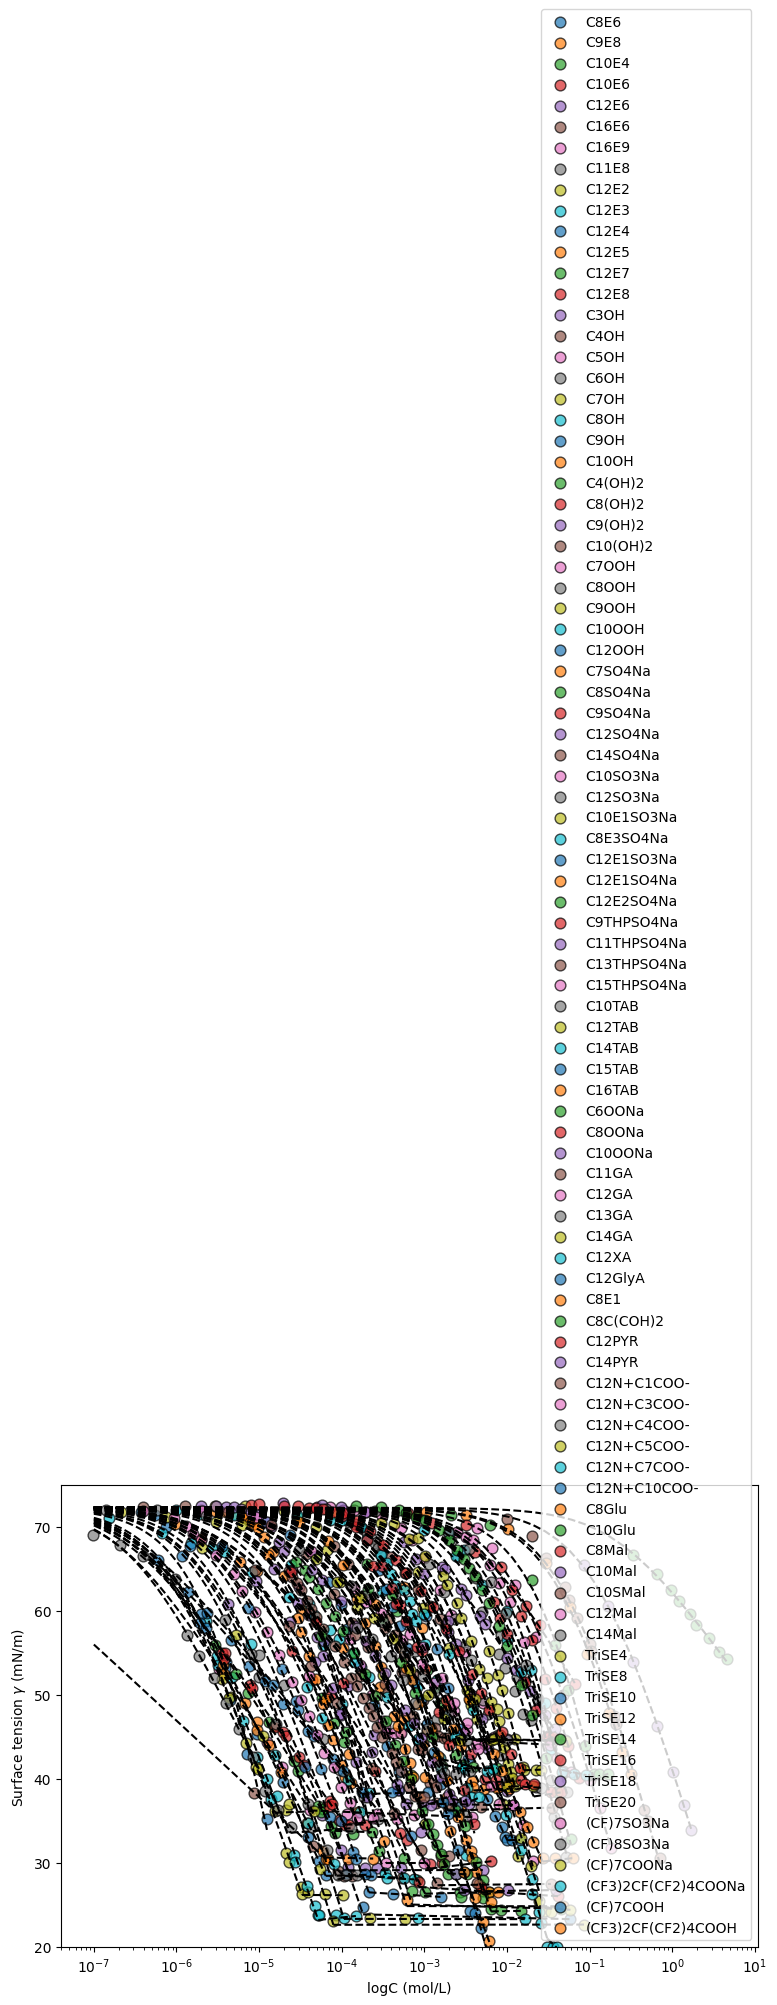

In [7]:
all_data = pd.read_excel('061024_data_surface_tension.xlsx',sheet_name = None)

# Print the sheet names
print("Sheet names:", all_data.keys())
# print(all_data)
mol_names = ['C8E6', 'C9E8', 'C10E4', 'C10E6', 'C12E6', 'C16E6', 'C16E9', 'C11E8',
             'C12E2', 'C12E3', 'C12E4', 'C12E5',  'C12E7',  'C12E8',
             'C3OH', 'C4OH', 'C5OH', 'C6OH', 'C7OH', 'C8OH', 'C9OH', 'C10OH', 
             'C4(OH)2', 'C8(OH)2', 'C9(OH)2', 'C10(OH)2', 
             'C7OOH', 'C8OOH', 'C9OOH', 'C10OOH', 'C12OOH', 
             'C7SO4Na', 'C8SO4Na', 'C9SO4Na', 'C12SO4Na', 'C14SO4Na', 'C10SO3Na', 'C12SO3Na', 
             'C10E1SO3Na', 'C8E3SO4Na', 'C12E1SO3Na', 'C12E1SO4Na', 'C12E2SO4Na', 
             'C9THPSO4Na', 'C11THPSO4Na', 'C13THPSO4Na', 'C15THPSO4Na', 
             'C10TAB', 'C12TAB', 'C14TAB', 'C15TAB', 'C16TAB', 
             'C6OONa', 'C8OONa', 'C10OONa', 
             'C11GA', 'C12GA', 'C13GA', 'C14GA', 'C12XA', 'C12GlyA', 
             'C8E1', 'C8C(COH)2',
             'C12PYR', 'C14PYR', 
             'C12N+C1COO-', 'C12N+C3COO-', 'C12N+C4COO-', 'C12N+C5COO-', 'C12N+C7COO-', 'C12N+C10COO-',
             'C8Glu','C10Glu','C8Mal','C10Mal','C10SMal','C12Mal','C14Mal',
             'TriSE4', 'TriSE8', 'TriSE10', 'TriSE12', 'TriSE14', 'TriSE16', 'TriSE18', 'TriSE20', 
             '(CF)7SO3Na', '(CF)8SO3Na', '(CF)7COONa', '(CF3)2CF(CF2)4COONa', '(CF)7COOH', '(CF3)2CF(CF2)4COOH']
# mol_names = ['C8E6','C3OH','C10(OH)2','C7OOH','C9THPSO4Na','C12PYR','C12N+C1COO-','C8Glu','TriSE4','(CF)7SO3Na']
_, ax = plt.subplots(figsize = (9, 6))
# Access each sheet's DataFrame
#for mol_name, df in all_data.items():
size = len(mol_names)


array = np.empty((size,8),dtype=object) # smiles | name | T | C_Nacl | Gamma_max | logK_L | cmc 
for i, mol_name in enumerate(mol_names):
    data = all_data[mol_name]
    if 'cmc' in data['cmc_indication'].values:
        gamma_m_tmp, Am_tmp, logK_L_tmp, cmc_tmp = szyszkowski(mol_name, data,ax)
    else:
        gamma_m_tmp, Am_tmp, logK_L_tmp, cmc_tmp = szyszkowski_nocmc(mol_name, data,ax)

    array[i][0]=data['smiles'][0]
    array[i][1]=data['name'][0]
    array[i][2]=data['temperature'][0]
    array[i][3]=gamma_m_tmp
    array[i][4]=Am_tmp
    array[i][5]=logK_L_tmp
    array[i][6]=cmc_tmp
    array[i][7]=data['ref'][0]

export = True
if export:
    df_export = pd.DataFrame(array, columns=['smiles','name','T','SurfaceExcess (mol/m2)','Am (A2)','LogK_L (m3/mol)','LogCMC (M)','Ref'])
    df_export.to_excel('output.xlsx')

C8OONa
Fitted Gamma_m: 8.017649245959032e-06 (mol/m2)
area per molecule: 20.70809191151205
Fitted K_ad: 0.17518307601900918 (log m3/mol)
C8SO4Na
Fitted Gamma_m: 1.0318453366369083e-05 (mol/m2)
area per molecule: 16.090610831340957
Fitted K_ad: -1.6471422158403348 (log m3/mol)


Text(0, 0.5, 'Surface tension $\\gamma$ (mN/m)')

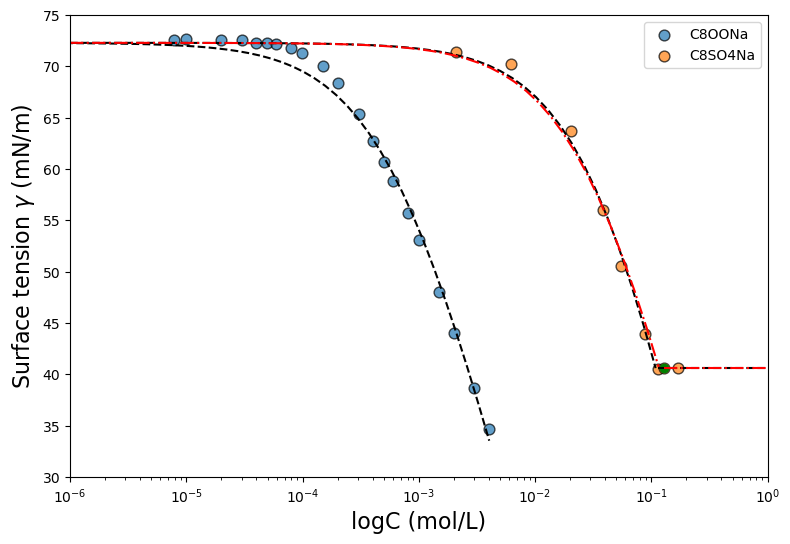

In [ ]:
all_data = pd.read_excel('exp_paper/061024_data_surface_tension.xlsx',sheet_name = None)
# _, ax = plt.subplots(figsize = (4,4))
_, ax = plt.subplots(figsize = (9,6))

ax.set_xscale("log")
mol_names=['C8OONa','C8SO4Na']
for i, mol_name in enumerate(mol_names):
    data = all_data[mol_name]
    if 'cmc' in data['cmc_indication'].values:
        gamma_m_tmp, Am_tmp, logK_L_tmp, cmc_tmp = szyszkowski(mol_name, data,ax)
    else:
        gamma_m_tmp, Am_tmp, logK_L_tmp, cmc_tmp = szyszkowski_nocmc(mol_name, data,ax)

ax.set_xlim([1e-6,1e0])
ax.set_ylim([30,75])


# C8SO4Na
# Fitted Gamma_m: 1.0318453366369083e-05 (mol/m2)
# Fitted K_ad: -1.6471422158403348 (log m3/mol)
# 0.113566688	40.56275862: cmc, gamma_cmc
cmc_test = 0.113566688
r_cmc_test = 40.56275862
# ax.scatter(cmc_test,r_cmc_test,c='g')

param = [1.0318453366369083e-05,10**(-1.6471422158403348)*1e3] # Gamma_m (mol/m2), K_ad (L/mol)
c1 = np.logspace(-6,np.log10(cmc_test)-0.018)
ax.plot(c1, func(c1,*param),'--k')
ax.plot([cmc_test,1],[40.6137931,40.6137931],'--k')

##########################################################
# C8SO4Na_test
# Fitted Gamma_m: 8.63508331362991e-06 (mol/m2)
# Fitted K_ad: -1.5349453399128812 (log m3/mol)
# 0.128353377	40.6137931 : cmc, gamma_cmc
cmc_test = 0.128353377
r_cmc_test = 40.6137931
ax.scatter(cmc_test,r_cmc_test,c='g')

param = [8.63508331362991e-06,10**(-1.5349453399128812)*1e3] # Gamma_m (mol/m2), K_ad (L/mol)
c1 = np.logspace(-6,np.log10(cmc_test)-0.045)
ax.plot(c1, func(c1,*param),'-.r')
ax.plot([cmc_test,1],[40.6137931,40.6137931],'-.r')
ax.set_xlabel('logC (mol/L)',fontsize=16)
ax.set_ylabel(r'Surface tension $\gamma$ (mN/m)',fontsize=16)
# ax.set_xlim([0.01,1])
# ax.set_ylim([38,45])

